<span style="font-familiy:Arial; font-weight:800; font-size:25px"> Compare standard DYCOMS simulations to Ackerman, et al. 2009 simulations </span>

# Setup notebook

## Load packages

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import scipy.stats

In [2]:
savefigs = False

load_TS = True
load_profiles = True

In [3]:
# import own functions
from importnb import Notebook

with Notebook(): 
        import functions as fkts
        import namelist as nml
        from set_up_case_dict import *

In [4]:
# load a MIMICA file to get the grid
ds_mimica = xr.open_dataset(dct_all["SMD"]["r0_010e-7"]["65e06"]["dir_prf"])

ds_mimica

<xarray.Dataset>
Dimensions:          (VT: 2, Z: 96, time: 361)
Coordinates:
  * Z                (Z) float32 2.512 7.606 12.91 ... 1.382e+03 1.459e+03
  * time             (time) float32 0.0 61.82 120.7 ... 2.154e+04 2.16e+04
Dimensions without coordinates: VT
Data variables:
    Z_BD             (Z, VT) float32 ...
    U                (time, Z) float32 ...
    V                (time, Z) float32 ...
    W                (time, Z) float32 ...
    T                (time, Z) float32 ...
    PT               (time, Z) float32 ...
    RHO              (time, Z) float32 ...
    RHO_pert         (time, Z) float32 ...
    Qv               (time, Z) float32 ...
    Qc               (time, Z) float32 ...
    Qr               (time, Z) float32 ...
    Nc               (time, Z) float32 ...
    Nr               (time, Z) float32 ...
    Dc               (time, Z) float32 ...
    Dr               (time, Z) float32 ...
    Ksgs             (time, Z) float32 ...
    TKE              (time, Z) float32 ...
    TKE_sgs          (time, Z) float32 ...
    S2               (time, Z) float32 ...
    N2               (time, Z) float32 ...
    RH               (time, Z) float32 ...
    RHi              (time, Z) float32 ...
    DT_RAD           (time, Z) float32 ...
    N_AERO1          (time, Z) float32 ...
    M_AERO1          (time, Z) float32 ...
    MA_AERO1         (time, Z) float32 ...
    QT_tend_1        (time, Z) float32 ...
    QC_tend_1        (time, Z) float32 ...
    QR_tend_1        (time, Z) float32 ...
    Q1_micro_1       (time, Z) float32 ...
    N1_micro_1       (time, Z) float32 ...
    Q2_micro_1       (time, Z) float32 ...
    N2_micro_1       (time, Z) float32 ...
    NAERO1_tend_1    (time, Z) float32 ...
    MAAERO1_tend_1   (time, Z) float32 ...
    QT_tend_2        (time, Z) float32 ...
    QC_tend_2        (time, Z) float32 ...
    QR_tend_2        (time, Z) float32 ...
    Q1_micro_2       (time, Z) float32 ...
    N1_micro_2       (time, Z) float32 ...
    Q2_micro_2       (time, Z) float32 ...
    N2_micro_2       (time, Z) float32 ...
    NAERO1_tend_2    (time, Z) float32 ...
    MAAERO1_tend_2   (time, Z) float32 ...
    QT_tend_3        (time, Z) float32 ...
    QC_tend_3        (time, Z) float32 ...
    QR_tend_3        (time, Z) float32 ...
    Q1_micro_3       (time, Z) float32 ...
    N1_micro_3       (time, Z) float32 ...
    Q2_micro_3       (time, Z) float32 ...
    N2_micro_3       (time, Z) float32 ...
    NAERO1_tend_3    (time, Z) float32 ...
    MAAERO1_tend_3   (time, Z) float32 ...
    QT_tend_4        (time, Z) float32 ...
    QC_tend_4        (time, Z) float32 ...
    QR_tend_4        (time, Z) float32 ...
    Q1_micro_4       (time, Z) float32 ...
    N1_micro_4       (time, Z) float32 ...
    Q2_micro_4       (time, Z) float32 ...
    N2_micro_4       (time, Z) float32 ...
    NAERO1_tend_4    (time, Z) float32 ...
    MAAERO1_tend_4   (time, Z) float32 ...
    QT_tend_5        (time, Z) float32 ...
    QC_tend_5        (time, Z) float32 ...
    QR_tend_5        (time, Z) float32 ...
    Q1_micro_5       (time, Z) float32 ...
    N1_micro_5       (time, Z) float32 ...
    Q2_micro_5       (time, Z) float32 ...
    N2_micro_5       (time, Z) float32 ...
    NAERO1_tend_5    (time, Z) float32 ...
    MAAERO1_tend_5   (time, Z) float32 ...
    QT_tend_6        (time, Z) float32 ...
    QC_tend_6        (time, Z) float32 ...
    QR_tend_6        (time, Z) float32 ...
    Q1_micro_6       (time, Z) float32 ...
    N1_micro_6       (time, Z) float32 ...
    Q2_micro_6       (time, Z) float32 ...
    N2_micro_6       (time, Z) float32 ...
    NAERO1_tend_6    (time, Z) float32 ...
    MAAERO1_tend_6   (time, Z) float32 ...
    QT_tend_7        (time, Z) float32 ...
    QC_tend_7        (time, Z) float32 ...
    QR_tend_7        (time, Z) float32 ...
    Q1_micro_7       (time, Z) float32 ...
    N1_micro_7       (time, Z) float32 ...
    Q2_micro_7       (time, Z) float32 ...
    N2_micro_7       (time

## load Ackermann, et al. 2009 data
Note: loading data direclty using xarray does result in an MissingDimensionsError
<br> --> use netCDF4 insted  

The Ackerman et al. 2009 simulations include
* **11 modeling groups**
* **14 models** (tree groups with two model versions)
* simulations with and without **drizzle**
* simulations with and without **sedimentation**

The dimension named "drizzle" has a length of 2, with the first (second) 
element corresponding to drizzle being off (on).  Likewise, the first 
(second) element of the dimension named "sed" corresponds to cloud-water 
sedimentation being omitted (included).

In [5]:
# select which cases should be used
# (I don't yet know which index stands for on/off)
idrizz = 1
ised = 1
itime = -1

In [6]:
dir_val_prof = os.path.join('/proj', 'bolinc', 'users', 'x_matsc',\
                            'DYCOMS_Ackermann2009_data',\
                            'BLCWG_DYCOMS-II_RF02.profiles.nc')
dir_val_scal = os.path.join('/proj', 'bolinc', 'users', 'x_matsc',\
                            'DYCOMS_Ackermann2009_data',\

                            'BLCWG_DYCOMS-II_RF02.scalars.nc')

### Load Scalars

In [7]:
nc = netCDF4.Dataset(dir_val_prof)


In [8]:
list(nc.variables)

['label',
 'missing',
 'time',
 'zmap',
 'nzt',
 'nzw',
 'zt',
 'zw',
 'dz',
 'u',
 'v',
 'thetal',
 'qt',
 'ql',
 'rho',
 'u_var',
 'v_var',
 'w_var',
 'w_skw',
 'sgs_tke',
 'thetal_var',
 'ql_var',
 'qt_var',
 'rad_flx',
 'tot_tw',
 'sgs_tw',
 'tot_qw',
 'sgs_qw',
 'tot_uw',
 'sgs_uw',
 'tot_vw',
 'sgs_vw',
 'tot_shr',
 'tot_boy',
 'transport',
 'dissipation',
 'sgs_boy',
 'precip',
 'ss',
 'cfrac',
 'ndrop_cld',
 'qr',
 'sgs_pr',
 'sgs_shr']

In [9]:
am09_vars = ["w_var", "cfrac", "ndrop_cld", "qt", "ql"]

In [10]:
nc["qr"]

<class 'netCDF4._netCDF4.Variable'>
float32 qr(group, drizzle, sed, ntime, nz)
    units: [g/kg]
    longname: Rain water mixing ratio
unlimited dimensions: 
current shape = (14, 2, 2, 13, 301)
filling on, default _FillValue of 9.969209968386869e+36 used

In [11]:
# get the names of the models
mods = []
for iname in nc["label"]:
    h = []
    [h.append(i.decode("utf-8")) for i in iname.data]
    mods.append("".join(h))
    
print("Model names:")
print(mods)    

Model names:
['COAMPS', 'COAMPS_SL', 'DHARMA', 'DHARMA_BO', 'MetO', 'MPI', 'NHM', 'RAMS', 'Reading', 'SAM', 'UCLA', 'UCLA_SB', 'Utah', 'WVU']


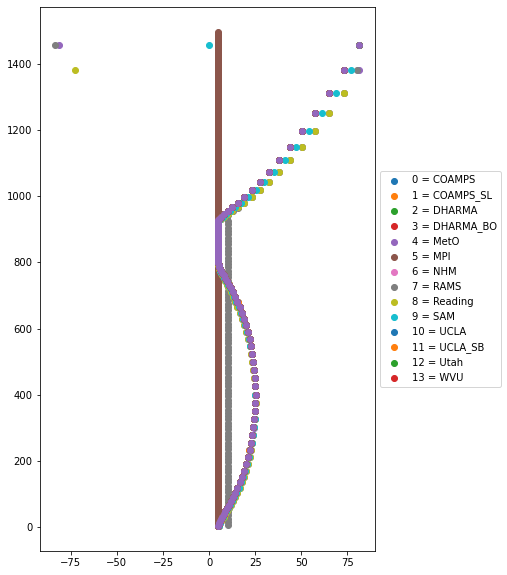

In [12]:
# check out vertical grid
plt.figure(figsize = [6,10])
for imod in range(len(mods)):
    smod = mods[imod]
    plt.scatter(nc["dz"][imod, ised, idrizz].filled(np.nan),\
                nc["zt"][imod, ised, idrizz].filled(np.nan),\
                label = str(imod) + " = " + smod)

    
plt.scatter(ds_mimica["Z_BD"][:,1] - ds_mimica["Z_BD"][:,0], ds_mimica["Z"])
plt.legend(bbox_to_anchor=(1, 0.5), loc = "center left")

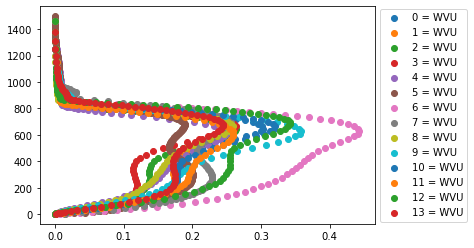

In [13]:
for imod in range(len(mods)):
    plt.scatter(nc["w_var"][imod, idrizz, ised, itime,:].filled(np.nan),\
             nc["zt"][imod, ised, idrizz].filled(np.nan),\
             label = str(imod) + " = " + smod)

    plt.legend(bbox_to_anchor=(1, 0.5), loc = "center left")


In [14]:
# get the vertial grid form MIMICA simulations

In [15]:
list(dct_all["SMD"])

['r0_010e-7',
 'r0_020e-7',
 'r0_030e-7',
 'r0_040e-7',
 'r0_050e-7',
 'r0_060e-7',
 'r0_070e-7',
 'r0_080e-7',
 'r0_090e-7',
 'r0_100e-7',
 'rwet']

In [16]:
w_var = pd.DataFrame(index = ds_mimica.Z)

In [17]:
dct_am09 = {}

In [18]:
for ivar in am09_vars:
    print(ivar)
    idf = pd.DataFrame(index = ds_mimica.Z, columns = mods)
    for imod in range(len(mods)):
        smod = mods[imod]

        for iz in range(len(ds_mimica.Z)):

            z_lo = ds_mimica["Z_BD"][iz,0].values
            z_hi = ds_mimica["Z_BD"][iz,1].values

            z_mod = nc["zt"][imod, ised, idrizz].filled(np.nan)


            zidx = np.where((z_mod >= z_lo) & (z_mod <= z_hi))[0]

            if len(zidx)>0:
                idf.iloc[iz][smod]= np.nanmean(nc[ivar][imod, ised, idrizz, itime, zidx].data)
    dct_am09.update({ivar:idf.copy()})

w_var
cfrac
ndrop_cld
qt
ql


In [19]:
dct_am09["ndrop_cld"]

,COAMPS,COAMPS_SL,DHARMA,DHARMA_BO,MetO,MPI,NHM,RAMS,Reading,SAM,UCLA,UCLA_SB,Utah,WVU
Z,,,,,,,,,,,,,,
2.511814,0,0,0,0,9.96921e+36,9.96921e+36,9.96921e+36,0,0,55,0,0,55,0
7.606128,0,0,0,0,9.96921e+36,9.96921e+36,9.96921e+36,NaN,0,55,0,0,55,0
12.911505,0,0,0,0,9.96921e+36,9.96921e+36,9.96921e+36,0,0,55,0,0,55,0
18.565361,0,0,0,0,9.96921e+36,9.96921e+36,9.96921e+36,NaN,0,55,0,0,55,0
24.700222,0,0,0,0,9.96921e+36,9.96921e+36,9.96921e+36,0,0,55,0,0,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197.951416,0,0,0,0,9.96921e+36,9.96921e+36,9.96921e+36,0,0,55,0,0,55,0
1251.933716,0,0,0,0,9.96921e+36,9.96921e+36,9.96921e+36,0,0,55,0,0,55,0
1313.151123,0,0,0,0,9.96921e+36,9.96921e+36,9.96921e+36,0,0,55,0,0,55,0


In [20]:
# remove some weird CDNC values
dct_am09["ndrop_cld"]["NHM"] = np.nan
dct_am09["ndrop_cld"]["MetO"] = np.nan
dct_am09["ndrop_cld"]["MPI"] = np.nan
dct_am09["ndrop_cld"]["SAM"] = np.nan
dct_am09["ndrop_cld"]["Utah"] = np.nan


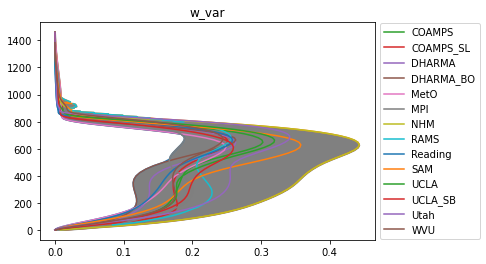

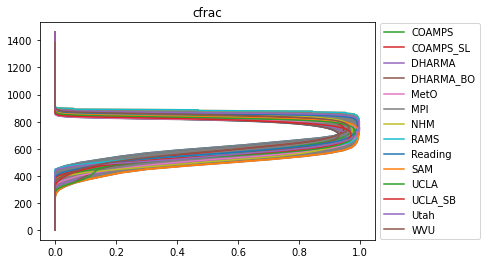

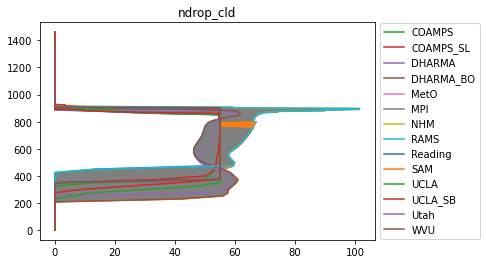

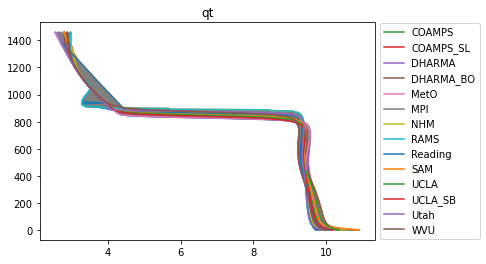

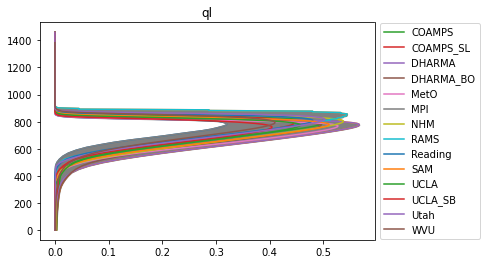

In [21]:
for ivar in am09_vars:
    plt.plot(dct_am09[ivar].min(axis=1), dct_am09[ivar].index)
    plt.plot(dct_am09[ivar].max(axis=1), dct_am09[ivar].index)
    plt.fill_betweenx(x1 =dct_am09[ivar].min(axis=1),\
                      x2 = dct_am09[ivar].max(axis=1),\
                      y = w_var.index,\
                      color = "grey")
    
    for imod in range(len(mods)):
        plt.plot(dct_am09[ivar][mods[imod]], dct_am09[ivar].index, label = mods[imod])
    plt.title(ivar)
    plt.legend(bbox_to_anchor=(1, 0.5), loc = "center left")
    plt.show()

## Precalculate all model statistics (for quicker plotting)

In [22]:
dct_mod = {}

In [23]:
# calculate updraft variabiliey
h_df = pd.DataFrame(index = ds_mimica.Z)

for sgrp in dct_all:
    for stype in dct_all[sgrp]:
        for scase in dct_all[sgrp][stype]:
            ids = xr.open_dataset(dct_all[sgrp][stype][scase]["dir_3d"])

            ids_std = ids["W"][-1].var(axis = (1,2))
            h_df[sgrp+stype+scase] = ids_std
dct_mod.update({"w_var":h_df})

In [24]:
# calculate liquid water
h_df = pd.DataFrame(index = ds_mimica.Z)
for sgrp in dct_all:
    for stype in dct_all[sgrp]:
        for scase in dct_all[sgrp][stype]:
            ids = xr.open_dataset(dct_all[sgrp][stype][scase]["dir_prf"])
            h_df[sgrp+stype+scase] = (ids["Qr"][-1]+ids["Qc"][-1])*1000
dct_mod.update({"ql":h_df})

In [25]:
# calculate total water
h_df = pd.DataFrame(index = ds_mimica.Z)
for sgrp in dct_all:
    for stype in dct_all[sgrp]:
        for scase in dct_all[sgrp][stype]:
            ids = xr.open_dataset(dct_all[sgrp][stype][scase]["dir_prf"])
            h_df[sgrp+stype+scase] = (ids["Qr"][-1]+ids["Qc"][-1]+ids["Qv"][-1])*1000
dct_mod.update({"qt":h_df})

In [26]:
# calculate total water
h_df = pd.DataFrame(index = ds_mimica.Z)
for sgrp in dct_all:
    for stype in dct_all[sgrp]:
        for scase in dct_all[sgrp][stype]:
            ids = xr.open_dataset(dct_all[sgrp][stype][scase]["dir_prf"])
            h_df[sgrp+stype+scase] = (ids["Nc"][-1]+ids["Nr"][-1])/1e6
dct_mod.update({"ndrop_cld":h_df})

### Do some plotting

In [27]:
list(dct_am09)

['w_var', 'cfrac', 'ndrop_cld', 'qt', 'ql']

In [28]:
var_plt = ['w_var', 'ndrop_cld', 'qt', 'ql']

In [49]:
lbl_col = []

In [30]:
var_plt

['w_var', 'ndrop_cld', 'qt', 'ql']

In [31]:
svar = "qt"

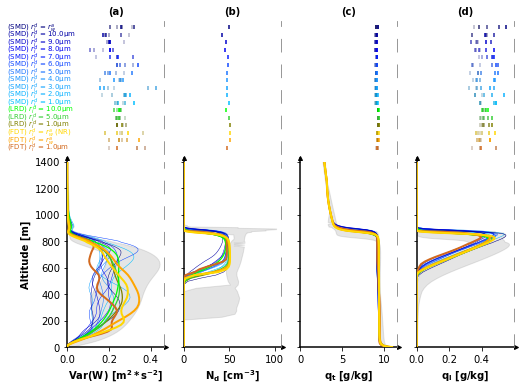

In [50]:
# calculate updraft variabiliey
fix, ax = plt.subplots(ncols = len(var_plt), nrows = 2, figsize = [8,6],\
                       sharey=False, sharex=False,\
                       gridspec_kw={'height_ratios': [2.5, 3.5]})
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.05)


for ivar in range(len(var_plt)):
    svar = var_plt[ivar]
    for sgrp in dct_all:
        for stype in dct_all[sgrp]:
            scase = "65e06"
            
            ax[1,ivar].plot(dct_mod[svar][sgrp+stype+scase], ids.Z,\
                    color = dct_all[sgrp][stype][scase]["color_drk"],\
                    zorder = dct_all[sgrp][stype][scase]["zord"],\
                    alpha = dct_all[sgrp][stype][scase]["alpha_up"],\
                    linewidth = dct_all[sgrp][stype][scase]["lw"]*0.25)


for ivar in range(len(var_plt)):
    svar = var_plt[ivar]
    for sgrp in dct_all:
        for stype in dct_all[sgrp]:
            
            for scase in dct_all[sgrp][stype]:
                if (svar == "ndrop_cld") & (scase != "65e06"):
                    continue
                    
                else:
                    if svar == "qt":
                        help_val = [dct_mod[svar][sgrp+stype+scase].median()]
                    else:
                        help_val = [dct_mod[svar][sgrp+stype+scase].max()]
                        
                    ax[0,ivar].scatter(help_val,
                                      dct_all[sgrp][stype][scase]["label"],
                                      marker="|",
                                      s=10,\
                                      color=dct_all[sgrp][stype][scase]["color_drk"],
                                      alpha = dct_all[sgrp][stype][scase]["alpha_up"])
            lbl_col.append(dct_all[sgrp][stype][scase]["color_drk"])
            
                
            
            

    ax[1,ivar].fill_betweenx(x1 =dct_am09[svar].min(axis=1),\
              x2 = dct_am09[svar].max(axis=1),\
              y = w_var.index,\
              color = "grey",\
              alpha = 0.2)




ax[0,0].tick_params(axis='y',labelsize = 7, pad = 60)

for tick in ax[0,0].get_yticklabels():
    tick.set_verticalalignment("center")
    tick.set_horizontalalignment("left")

for color,tick in zip(lbl_col,ax[0,0].yaxis.get_major_ticks()):
    tick.label1.set_color(color) #set the color property

# turn off label in upper row
for iax in ax[0,:]:
    iax.tick_params(axis='y', length = 0, labelsize = 7)
    iax.tick_params(axis='x', length = 0, labelsize = 7)
    iax.xaxis.set_ticklabels([])
    
    for ispine in ["left", "top", "bottom"]:
        iax.spines[ispine].set_visible(False)

# Add dashed lines betwen upper plots
for iax in ax[1,:].flatten():
    iax.spines[ispine].set_visible(True)
    iax.spines["left"].set_color("grey")
    iax.spines["left"].set_linestyle((0,(16,16))) 

# turn off label in lower row
for iax in ax[1,:]:
    for ispine in ["left", "top", "bottom"]:
        iax.spines[ispine].set_visible(False)
        
for iax in ax.flatten():      
    iax.spines["right"].set_color("grey")
    iax.spines["right"].set_linestyle((0,(16,16))) 

        
# make arrows
for iax in ax[1,:]:
    iax.set_xlim(xmin = 0)
    iax.set_ylim(0,1400)

    ymin, ymax = iax.get_ylim()
    xmin, xmax = iax.get_xlim()
    mks = 4
    lwd = 1.5
    iax.plot((xmin, xmax*1.02), (ymin, ymin), color = "k",clip_on=False, linewidth  = lwd)
    iax.plot((xmax*1.02), (ymin), ls="", marker=">", ms=mks, color="k",clip_on=False, linewidth  = lwd)

    iax.plot((xmin, xmin), (ymin, ymax*1.02), color = "k",clip_on=False, linewidth  = lwd )
    iax.plot((xmin), (ymax*1.02), ls="", marker="^", ms=mks, color="k",clip_on=False, linewidth  = lwd)

for iax in ax[0,1:]:
    iax.yaxis.set_ticklabels([])
    
for iax in ax[1,1:]:
    iax.yaxis.set_ticklabels([])
    

    

for iax in range(np.shape(ax)[1]):
    ax[0,iax].set_xlim(ax[1,iax].get_xlim())

ax[1,0].set_ylabel("Altitude [m]", fontweight = "bold")
ax[1,0].set_xlabel("Var(W) [$\mathbf{m^2 * s^{-2}}$]", fontweight = "bold")
ax[1,1].set_xlabel("$\mathbf{N_d}$ $\mathbf{[cm^{-3}]}$", fontweight = "bold")
ax[1,2].set_xlabel("$\mathbf{q_t}$ $\mathbf{[g/kg]}$", fontweight = "bold")
ax[1,3].set_xlabel("$\mathbf{q_l}$ $\mathbf{[g/kg]}$", fontweight = "bold")

abcd = "(a)", "(b)", "(c)", "(d)"
for iax in range(np.shape(ax)[1]):
    ax[0,iax].text(0.5,1.05, abcd[iax], transform=ax[0,iax].transAxes, fontweight = "bold",\
                  ha = "center")

if savefigs:
    plt.savefig(os.path.join(nml.dir_output, "AM09_profile_validation.png"), dpi = 600,\
               bbox_inches = "tight")

In [ ]:
i

In [51]:
savefigs

True

In [ ]:
os.path.join(nml.dir_output, "AM09_profile_validation.png")

In [42]:

# Loop though all cases

# First loop through groups
## igrp is an interger number
## sgrp is a string
for igrp in range(len(dct_all)):
    sgrp = list(dct_all)[igrp]
    #print(sgrp)
    
    
    # loop though all simulations types
    ## isim is a number!
    ## ssmin is a string
    if (sgrp == "FDT"):
        #colors = ["firebrick", "red", "tomato", "chocolate", "gold"]
        #colormap = [mpl_cls.to_rgb(i) for i in colors]
        colors = ["#DB773D", "#7D5C48"]
        colors = ["chocolate", "orange", "gold"]
        colormap = LinearSegmentedColormap.from_list("mycmap", colors)(np.linspace(0,1, len(dct_all[sgrp])))
    if (sgrp == "SMD"):
        #colors = ["aquamarine","cyan","royalblue"]
        colors = ["deepskyblue", "dodgerblue", "blue", "navy"]
        #colors = ["#2176D1", "#98C1ED"]
        colormap = LinearSegmentedColormap.from_list("mycmap", colors)(np.linspace(0,1, len(dct_all[sgrp])))
    if (sgrp == "LRD"):
        #colors = ["darkviolet", "fuchsia", "lightpink"]
        #colors = ["#42AD70", "#47D685"]
        colors = ["olive", "limegreen", "lime"]
        colormap = LinearSegmentedColormap.from_list("mycmap", colors)(np.linspace(0,1, len(dct_all[sgrp]))) 
        
    for itype in range(len(dct_all[sgrp])):
        # get the name (string) of the simulation
        stype = list(dct_all[sgrp])[itype]
        #print("  " + stype)
        
        col_type = colormap[itype]
        
        # loop though cases in correct order
        cases = list(dct_all[sgrp][stype])
        cases_num = np.array(cases, dtype = float)
        srt_idx = np.argsort(cases_num)
        sort_case = [cases[i] for i in srt_idx]
               
        for icase in range(len(sort_case)):
            scase = sort_case[icase]

            ## chose two colors which for a case
            # first color = saturated
            # second color = unsaturated        
            
            ialpha_up= np.linspace(1,0.3, len(sort_case))[icase]
            ialpha_dwn = np.linspace(0.3,1, len(sort_case))[icase]
            
            icol  = [col_type[0], col_type[1], col_type[2]]
            
            drk_col = scale_lightness(col_type[:3], np.linspace(1, 0.5, len(sort_case))[icase] )
                        
            dct_all[sgrp][stype][scase].update({"color": icol})
            dct_all[sgrp][stype][scase].update({"color_drk": drk_col})
            dct_all[sgrp][stype][scase].update({"alpha_up": ialpha_up})
            dct_all[sgrp][stype][scase].update({"alpha_dwn": ialpha_dwn})
            
            # linewidhts
            if (sgrp == "SMD"):
                dct_all[sgrp][stype][scase].update({"lw":2})
            elif (sgrp == "LRD"):
                dct_all[sgrp][stype][scase].update({"lw":5})
            elif (sgrp == "FDT"):
                dct_all[sgrp][stype][scase].update({"lw":8})
            # zorders
            if (sgrp == "SMD"):
                dct_all[sgrp][stype][scase].update({"zord":2})
            elif (sgrp == "LRD"):
                dct_all[sgrp][stype][scase].update({"zord":5})
            elif (sgrp == "FDT"):
                dct_all[sgrp][stype][scase].update({"zord":10})
